In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# --- Load Dataset ---
data = pd.read_csv("./datasets/ratnapark_pm25_after_imputation.csv")

print("✅ Dataset Loaded:", data.shape)
display(data.head())
data.columns


✅ Dataset Loaded: (26304, 15)


,Unnamed: 0,PM2.5,YEAR,MO,DY,HR,PS,WS2M,WD2M,WS10M,WD10M,PRECTOTCORR,RH2M,QV2M,T2M
0,0,75.780952,2022,1,1,0,88.03,0.47,317.6,0.77,319.2,0.0,83.08,6.70,8.85
1,1,56.584127,2022,1,1,1,88.00,0.40,310.0,0.64,313.7,0.0,80.28,6.48,8.86
2,2,49.538710,2022,1,1,2,87.96,0.26,319.6,0.46,323.9,0.0,78.29,6.27,8.74
3,3,47.398438,2022,1,1,3,87.93,0.28,300.3,0.46,306.1,0.0,77.32,6.02,8.32
4,4,42.821875,2022,1,1,4,87.91,0.29,329.0,0.51,330.4,0.0,75.66,5.80,8.09


Index(['Unnamed: 0', 'PM2.5', 'YEAR', 'MO', 'DY', 'HR', 'PS', 'WS2M', 'WD2M',
       'WS10M', 'WD10M', 'PRECTOTCORR', 'RH2M', 'QV2M', 'T2M'],
      dtype='object')

In [3]:
target_col = 'PM2.5'
X = data[['YEAR','MO',	'DY',	'HR',	'PS',	'WS2M',	'WD2M',	'WS10M', 'WD10M', 'PRECTOTCORR',	'RH2M',	'QV2M',	'T2M']]
y = data[target_col]

In [4]:
# --- Check for Missing Values ---
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 Unnamed: 0     0
PM2.5          0
YEAR           0
MO             0
DY             0
HR             0
PS             0
WS2M           0
WD2M           0
WS10M          0
WD10M          0
PRECTOTCORR    0
RH2M           0
QV2M           0
T2M            0
dtype: int64


In [5]:

# --- Split into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling (important for SVR) ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [6]:

# --- Build SVR Model ---
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

# --- Train the Model ---
svr_model.fit(X_train_scaled, y_train_scaled)

# --- Predict and Inverse Transform ---
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [7]:
# --- Evaluation Metrics ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 SVR Model Performance:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


📊 SVR Model Performance:
MAE  : 7.702
RMSE : 11.716
R²   : 0.871


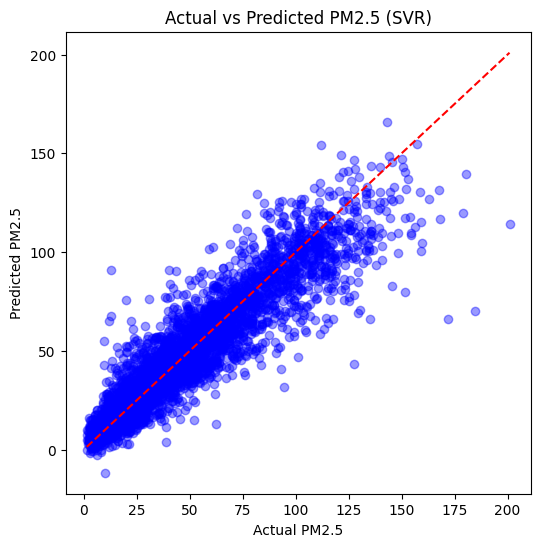

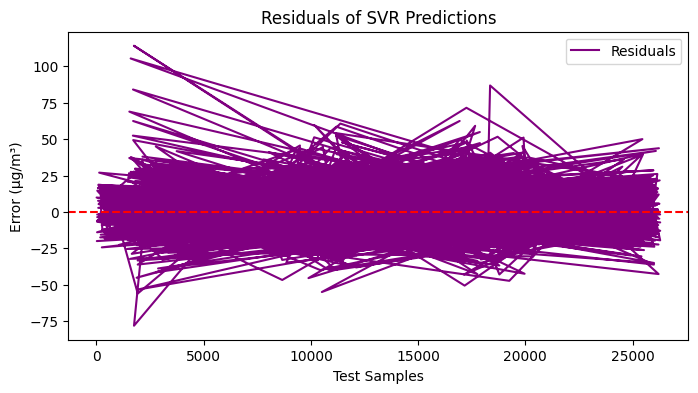

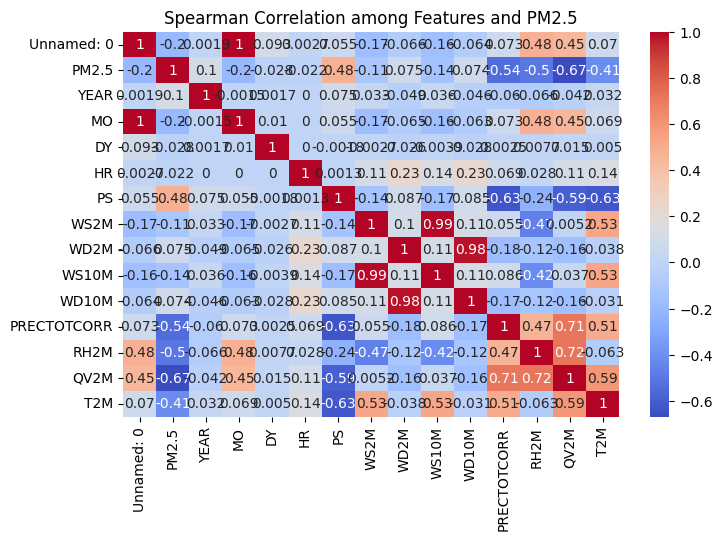

In [11]:
# --- Scatter Plot: Actual vs Predicted ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5 (SVR)")
plt.show()

# --- Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of SVR Predictions")
plt.xlabel("Test Samples")
plt.ylabel("Error (µg/m³)")
plt.legend()
plt.show()

# --- Correlation Heatmap (Optional) ---
corr = data.corr(method='spearman')
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation among Features and PM2.5")
plt.show()